In [21]:
import json

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [22]:
puzzle_info_df = pd.read_csv("./puzzles/puzzle_info.csv").to_numpy()

puzzle_info = {}

for puzzle_type, moves in puzzle_info_df:
    puzzle_info[puzzle_type] = json.loads(moves.replace("'", '"'))

puzzles_df = pd.read_csv("./puzzles/puzzles.csv").to_numpy()

sample_submission_df = pd.read_csv("./puzzles/sample_submission.csv").to_numpy()

Text(0.5, 1.0, 'Number of moves for each puzzle')

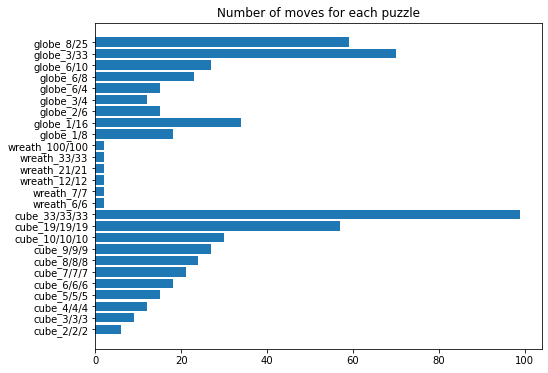

In [23]:
puzzle_names = list(puzzle_info.keys())
num_moves = [len(puzzle_info[name].keys()) for name in puzzle_names]

plt.figure(figsize=(8, 6))
plt.barh(puzzle_names, num_moves)
plt.title("Number of moves for each puzzle")

Text(0.5, 1.0, 'Number of puzzles for each puzzle')

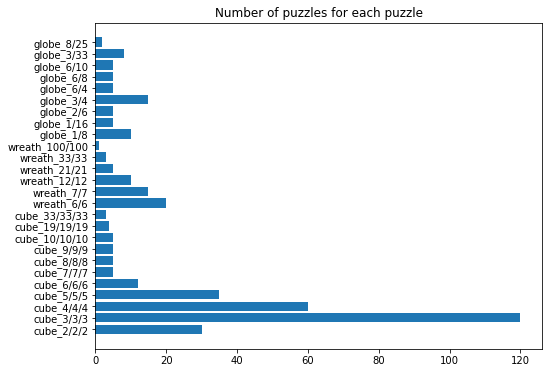

In [24]:
puzzle_counts = {puzzle_name:0 for puzzle_name in puzzle_names}

for _, puzzle, _, _, _ in puzzles_df:
    puzzle_counts[puzzle] += 1

plt.figure(figsize=(8, 6))
plt.barh(list(puzzle_counts.keys()), list(puzzle_counts.values()))
plt.title("Number of puzzles for each puzzle")

Text(0.5, 1.0, 'Size of state space for each puzzle')

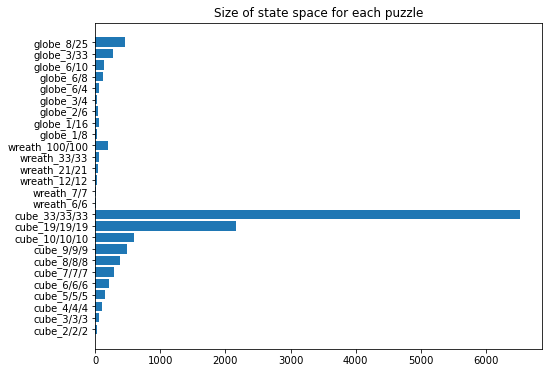

In [25]:
# state space size check

state_spaces = []
for puzzle_name, moves in puzzle_info.items():
    state_space_size = len(list(moves.values())[0])
    state_spaces.append(state_space_size)

plt.figure(figsize=(8, 6))
plt.barh(list(puzzle_counts.keys()), state_spaces)
plt.title("Size of state space for each puzzle")

1220590


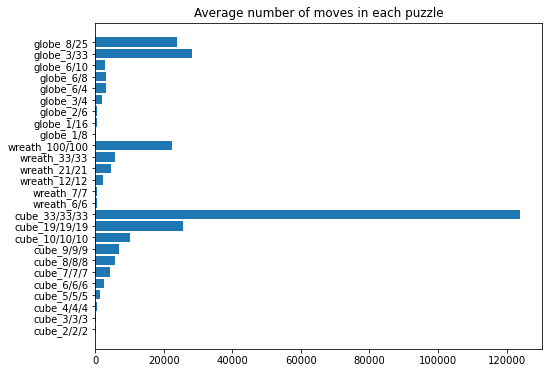

In [30]:
total_moves = 0
sol_moves = []
average_moves = {pname: [] for pname in puzzle_info.keys()}
for puzzle, submission in zip(puzzles_df, sample_submission_df):
    puzzle_name = puzzle[1]
    num_moves = len(submission[1].split("."))
    average_moves[puzzle_name].append(num_moves)
    sol_moves.append(num_moves)
    total_moves += num_moves

plt.figure(figsize=(8, 6))
plt.barh(
    list(puzzle_counts.keys()), [np.array([a]).mean() for a in average_moves.values()]
)
plt.title("Average number of moves in each puzzle")

print(total_moves)

# plt.hist(sol_moves, bins=100)
# plt.show()